# Unsupervised Learning
## DSSP Team
## Summer 2020

## Curse of Dimensionality

In this exercise, we will generate 250 random points uniformly in the unit hypercube of dimension 500. The goal is to study the maximal and the minimal distances between the points and the origin and then between the points themselves. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)
n = 250
d = 500
sample = np.random.uniform(size=[n, d])
sample

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.07773464, 0.97439481,
        0.98621074],
       [0.69816171, 0.53609637, 0.30952762, ..., 0.13681863, 0.95023735,
        0.44600577],
       [0.18513293, 0.54190095, 0.87294584, ..., 0.46349404, 0.37978578,
        0.86333365],
       ...,
       [0.89703648, 0.24582673, 0.67795724, ..., 0.53548237, 0.75680206,
        0.31885515],
       [0.60845525, 0.8966924 , 0.90346168, ..., 0.83113485, 0.9281156 ,
        0.57778899],
       [0.58842841, 0.02348352, 0.41489738, ..., 0.49719431, 0.96793235,
        0.55545546]])

__1)__ Compute the maximum and the minimum distances between all points and the origin using only the first two coordinates.

__Hint:__ Use `numpy` functions and a `sum` along the right axis.


In [4]:
#solution
dzero = np.sqrt((sample[:, 0:2] ** 2).sum(axis=1))
dzeromin = dzero.min()
dzeromin

0.004413974055069927

In [5]:
#solution
dzeromax = dzero.max()
dzeromax

1.3372684563657558

In [6]:
#solution
dzeromax/dzeromin

302.96246413812923

__2)__ Compute the maximum and the minimum distances between all the points and the origin using only the $d$ first coordinates for all $d$ in $1$ to $500$.

__Hint:__ Use `cumsum`

In [7]:
#solution
dzero = np.sqrt((sample ** 2).cumsum(axis=1))
dzeromin = dzero.min(axis=0)
dzeromax = dzero.max(axis=0)
dim = np.arange(1, d+1)

__3)__ Use `matplotlib` to plot those distances renormalized by the maximum distance in the unit hypercube ($\sqrt(d)$ in dimension $d$)

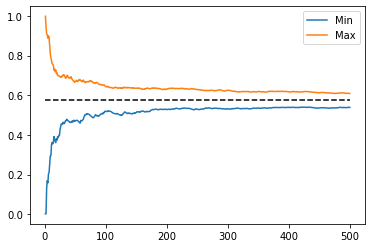

In [8]:
#solution
plt.plot(dim, dzeromin / np.sqrt(dim), label='Min')
plt.plot(dim, dzeromax / np.sqrt(dim), label='Max')
plt.hlines(np.sqrt(1/3), 1, d, 'k', linestyles='--')
plt.legend();

__4)__ Plot the ratio between the maximum and the minimum distances.

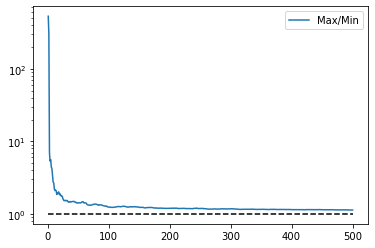

In [9]:
#solution
plt.plot(dim, dzeromax / dzeromin, label='Max/Min')
plt.hlines(1, 1, d, 'k', linestyles='--')
plt.legend();
plt.yscale('log');

__5)__ Compute the same quantities but for the distance between all points

__Hint:__ Beware of the distance between a point and itself.

In [10]:
#solution
dall = np.sqrt(((sample[:, None, :] - sample[None, :, :])**2).cumsum(axis=2))
dall[dall == 0]=np.NaN
dallmax = np.nanmax(dall, axis=(0,1))
dallmin = np.nanmin(dall, axis=(0,1))

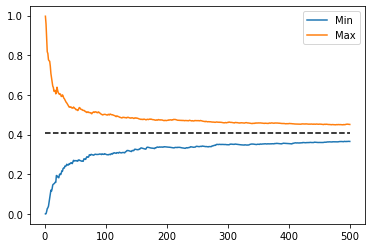

In [11]:
#solution
plt.plot(dim, dallmin / np.sqrt(dim), label='Min')
plt.plot(dim, dallmax / np.sqrt(dim), label='Max'),
plt.hlines(np.sqrt(1/6), 1, d, 'k', linestyles='--')
plt.legend();

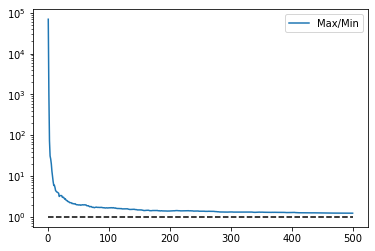

In [12]:
#solution
plt.plot(dim, dallmax / dallmin, label='Max/Min')
plt.hlines(1, 1, d, 'k', linestyles='--')
plt.legend();
plt.yscale('log');